In [1]:
using PyPlot

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


# Aufgabe 1
### Teil a
$$
M =
\begin{pmatrix}
1      & -1     & 0      & \cdots & 0      \\
-1     & 2      & \ddots & \ddots & \vdots \\
0      & \ddots & \ddots &        & 0      \\
\vdots & \ddots &        & 2      & -1     \\
0      & \cdots & 0      & -1     & 1      \\
\end{pmatrix}
$$

### Teil b 

In [2]:
function M(N)
    side = vcat(zeros(1,N), eye(N-1, N))
    diag = -2 * eye(N,N)
    diag[1,1] = -1
    diag[N,N] = -1
    return diag + side + side'
end

M (generic function with 1 method)

In [3]:
N = 10
a = M(N)
a_ew = eigvals(a)
a_ev = eigvecs(a)
k = m = 1
omega = sqrt(k/m*abs(a_ew))
omega

10-element Array{Float64,1}:
 1.97538   
 1.90211   
 1.78201   
 1.61803   
 1.41421   
 1.17557   
 0.907981  
 0.618034  
 0.312869  
 3.33811e-9

### Teil c
$$ 
\xi(0) = \sum_{n=1}^N \vec a_n \alpha_n = \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = A\vec\alpha \\
mit\ A = (\vec a_1, \vec a_2, \cdots, \vec a_N)\\
\dot \xi(0) = \sum_{n=1}^N \vec a_n \beta_n \omega_n = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = B\vec\beta \\
mit\ B = (\omega_1 \vec a_1, \omega_2 \vec a_2, \cdots, \omega_N \vec a_N) \\
\\
\Leftrightarrow \vec \alpha = A^{-1} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}\ und\ 
\vec \beta = B^{-1} \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix}
$$


In [4]:
A = copy(a_ev)
B = copy(a_ev)
for i in 1:N
    B[i,:] = B[i,:] .* a_ew[i]
end
xi_0 = zeros(N)
xi_0[1] = 1
dot_xi_0 = zeros(N)
alpha = inv(A)*xi_0

10-element Array{Float64,1}:
 -0.0699596
  0.138197 
  0.203031 
 -0.262866 
  0.316228 
 -0.361803 
 -0.39847  
 -0.425325 
 -0.441708 
  0.316228 

In [5]:
beta = inv(B)*dot_xi_0

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

# Aufgabe 2

In [6]:
function spinner(N)
    spins = Array(Int, 2^N, N)
    for i in 0:2^N-1
        base2 = bin(i,N)
        for j in 1:N
            if base2[j] == '0'
                spins[i+1,j] = 0
            else
                spins[i+1,j] = 1
            end
        end
    end
    for Sz in .5*N:-1:-.5*N
        println("Sz_ges = $Sz")
        for l in 1:2^N
            if sum(spins[l,:]-.5) == Sz
                psi = ""
                for val in spins[l,:]
                    psi = string(psi, val)
                end
                println("  l = $l, |psi> = |$psi>")
            end
        end
    end 
end
            
spinner(4)

Sz_ges = 2.0


# Aufgabe 3
### Teil a

In [7]:
M = 10
N = 1000
PyPlot.plt[:hist](rand(N), M)
title("Histogramm von $N Zufallszahlen")
xlabel("Zufallszahl")
ylabel("Anzahl der Zufallszahlen im Intervall")
show()

LoadError: invalid redefinition of constant M

### Teil b

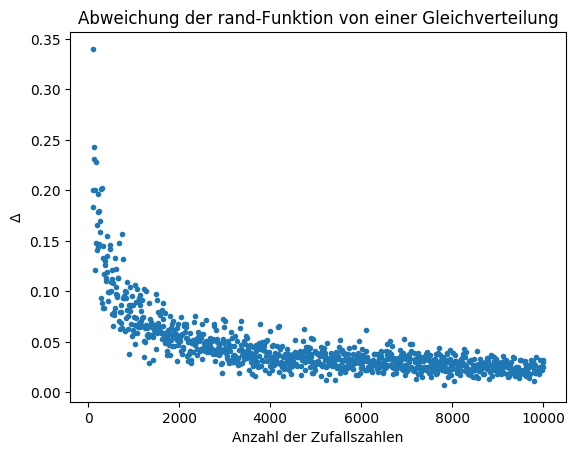

In [8]:
n = 1000
m = 10
Delta = zeros(n)
N = Int.(round.(linspace(1e2, 1e4, n)))
for i in 1:n
    r = rand(N[i])
    for j in 0:m-1
        P_j = sum(j/m .< r .<= (j+1)/m)
        Delta[i] += abs(P_j/N[i]-1/m)
    end
end
plot(N, Delta, ".")
title("Abweichung der rand-Funktion von einer Gleichverteilung")
xlabel("Anzahl der Zufallszahlen")
ylabel("\$\\Delta\$")
show()

### Pseudozufallsfunktion mit Parametersatz

In [9]:
function my_rand(N, u_0, a, c, m)
    u = Array{Float64}(N)
    u[1] = u_0
    for i in 2:N
        u[i] = (a*u[i-1]+c)%m
    end
    return u ./ m
end
# Parametersatz
m = [2.07131e7 605 50700]
a = [1.926094e6 172 20291]
c = [8.366849e6 89 18053]
u_0 = [4.451758e6 505 50517]
;

### Teil c

In [10]:
N = Int(1e5)
M = 20
for i in 1:3
    r = my_rand(N, u_0[i], a[i], c[i], m[i])
    i = 1
    rep = find(r .== r[i])
    while length(rep) < 2 && i < N
        i += 1
        rep = find(r .== r[i])
    end
    if length(rep) > 1
        p = rep[2]-i
        println("Die Periode von Parametersatz $i ist $p")
    else
        println("Es konnte keine Periodizität gefunden werden.")
    end
end

LoadError: invalid redefinition of constant M

### Teil d

In [11]:
N = Int(1e5)
M = 20
p = Array{Int}(3)
for i in 1:3
    r = my_rand(N, u_0[i], a[i], c[i], m[i])
    figure(i)
    PyPlot.plt[:hist](r, M)
    title("Histogramm des Parametersatzes $i")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
end
show()

LoadError: invalid redefinition of constant M

### Teil e

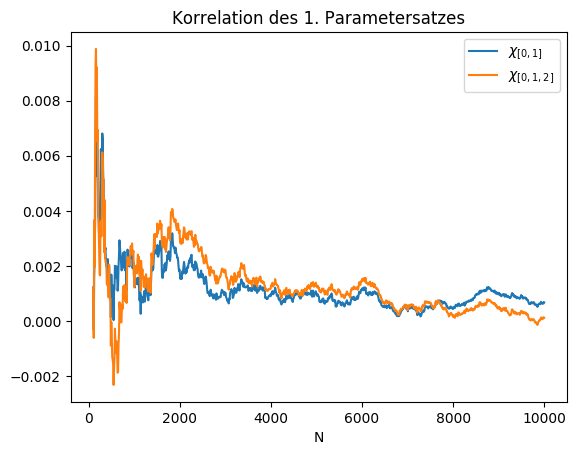

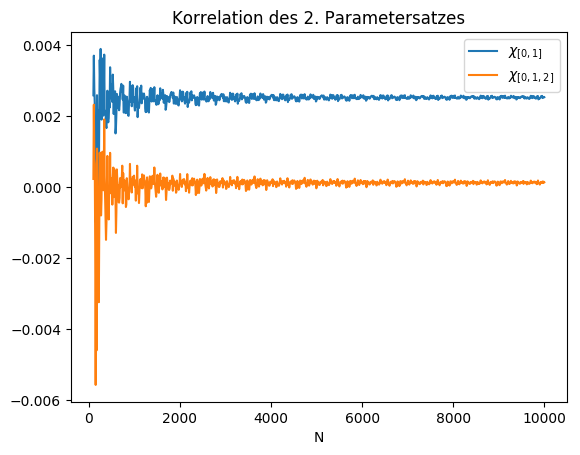

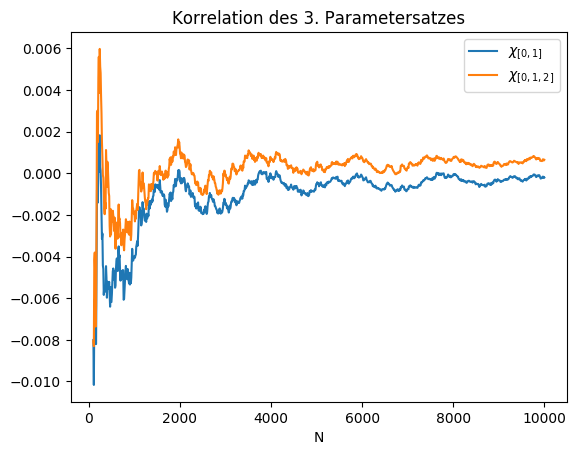

In [12]:
res = 1000
function chi(x, indices)
    N = length(x)
    N_i = length(indices)
    result = 0.
    for i in 1:N-indices[N_i]
        prod = 1.
        for j in indices
            prod *= x[i+j]
        end
        result += prod
    end
    return result/(N-indices[N_i]) - mean(x)^N_i
end
for i in 1:3
    N = Int.(round.(linspace(1e2,1e4, res)))
    cor01 = Array{Float64}(res)
    cor012 = Array{Float64}(res)
    for j in 1:length(N)
        cor01[j] = chi(my_rand(N[j], u_0[i], a[i], c[i], m[i]), [0,1])
        cor012[j] = chi(my_rand(N[j], u_0[i], a[i], c[i], m[i]), [0,1,2])
    end
    figure(i)
    plot(N, cor01, label="\$\\chi_{[0,1]}\$")
    plot(N, cor012, label="\$\\chi_{[0,1,2]}\$")
    title("Korrelation des $i. Parametersatzes")
    xlabel("N")
    legend()
end
show()